[Different Maps on ipyleaflet](https://ipyleaflet.readthedocs.io/en/latest/api_reference/basemaps.html)

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas

In [164]:
from ipyleaflet import Map, Marker, basemaps, basemap_to_tiles,Heatmap, LayersControl
from random import uniform

In [165]:
center = ( -9.8,34.9)

m = Map(basemap=basemaps.Esri.DeLorme,center=center, zoom=5)

marker = Marker(location=center, draggable=True)

marker1 = Marker(name='marker1', location=(48, -2))
marker2 = Marker(name='marker2', location=(50, 0))
marker3 = Marker(name='marker3', location=(52, 2))
m.add_layer(marker1)
m.add_layer(marker2)
m.add_layer(marker3)

control = LayersControl(position='topright')
m.add_control(control)

m.add_layer(marker);



#m.add_layer(heatmap)
display(m)

# Now that the marker is on the Map, you can drag it with your mouse,
# it will automatically update the `marker.location` attribute in Python

# You can also update the marker location from Python, that will update the
# marker location on the Map:
marker.location = ( -9.8,34.9)

Map(center=[-9.8, 34.9], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…

In [137]:
m = Map(
    layers=(basemap_to_tiles(basemaps.NASAGIBS.ModisTerraTrueColorCR, "2020-04-07"), ),
    center=(52.204793, 360.121558),
    zoom=4
)

m

Map(center=[52.204793, 360.121558], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

## 3

In [6]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))

In [115]:
values = pd.read_csv('values.csv')
values = values[values['longitude'] > 32.5]
values

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [38]:
! ls

Readme.mkd     b.csv          test.csv
Untitled.ipynb shapefiles     values.csv


In [102]:
# set the filepath and load
fp = 'shapefiles/waterways/waterways.shp' #reading the file stored in variable fp
map_df = gpd.read_file(fp)# check data type so we can see that this is not a normal dataframe, but a GEOdataframemap_df.head()


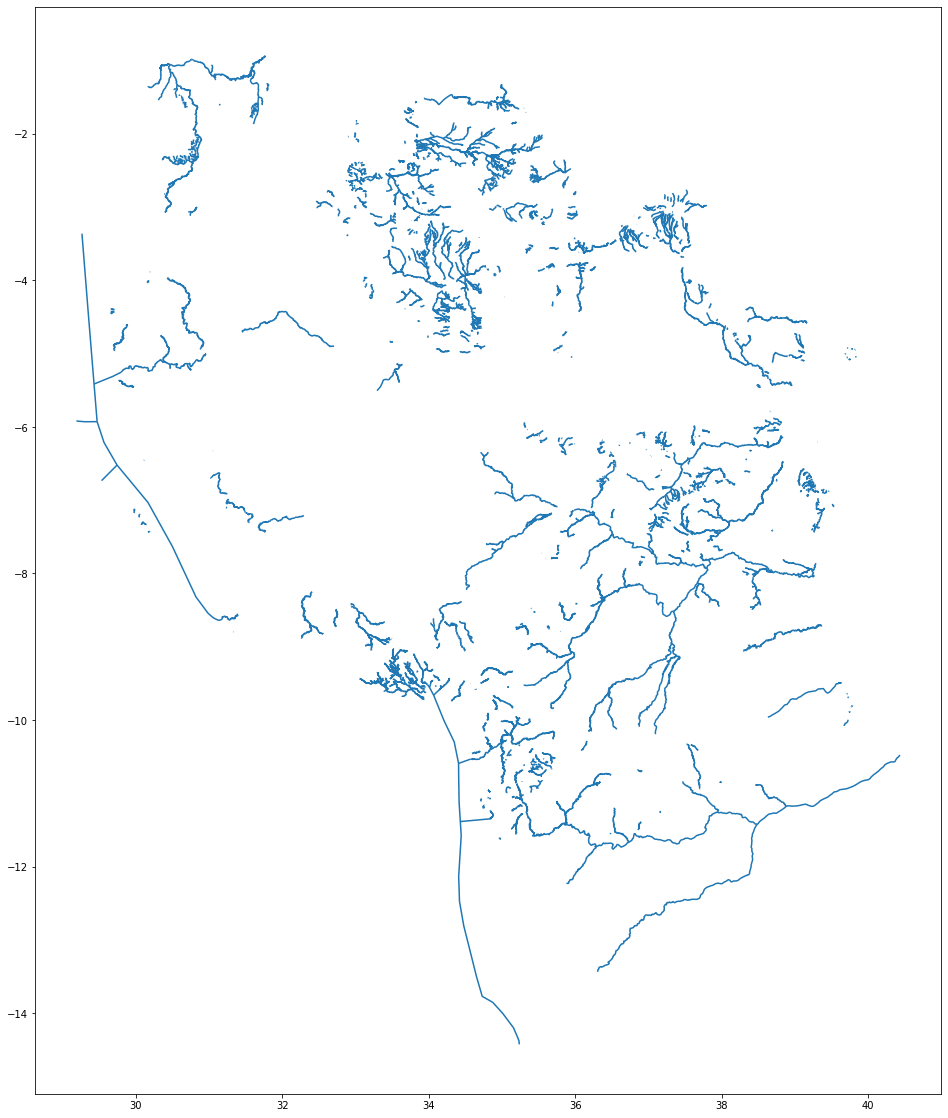

In [103]:
map_df.plot(figsize=(20,20))

In [47]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [77]:
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
print("Geometry Column Name : ", world.geometry.name)
print("Dataset Size : ", world.shape)
world.head()

Geometry Column Name :  geometry
Dataset Size :  (177, 6)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [51]:
nybb = geopandas.read_file(geopandas.datasets.get_path("nybb"))
nybb.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


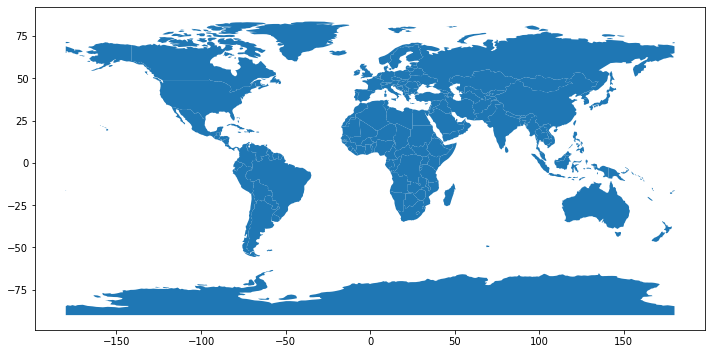

In [52]:
world.plot(figsize=(12,8));

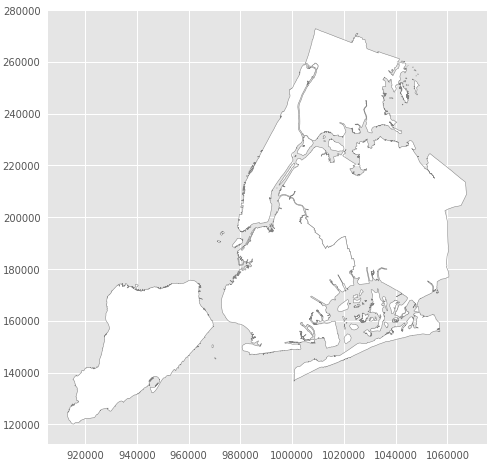

In [53]:
with plt.style.context(("seaborn", "ggplot")):
    nybb.plot(figsize=(12,8), color="white", edgecolor="grey");

In [65]:
cd aw_flatiron_group_projects/Module3_Project/

/Users/alphonsowoodbury/DS/Projects/aw_flatiron_group_projects/Module3_Project


In [67]:
world_happiness = pd.read_csv("2019.csv")
print("Dataset Size : ",world_happiness.shape)
world_happiness.head()

Dataset Size :  (156, 9)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [69]:
world_happiness_final = world.merge(world_happiness, how="left", left_on=['name'], right_on=['Country or region'])
print("Type of DataFrame : ", type(world_happiness_final))
world_happiness_final.head()

Type of DataFrame :  <class 'geopandas.geodataframe.GeoDataFrame'>


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",153.0,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",9.0,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/Users/alphonsowoodbury/opt/miniconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


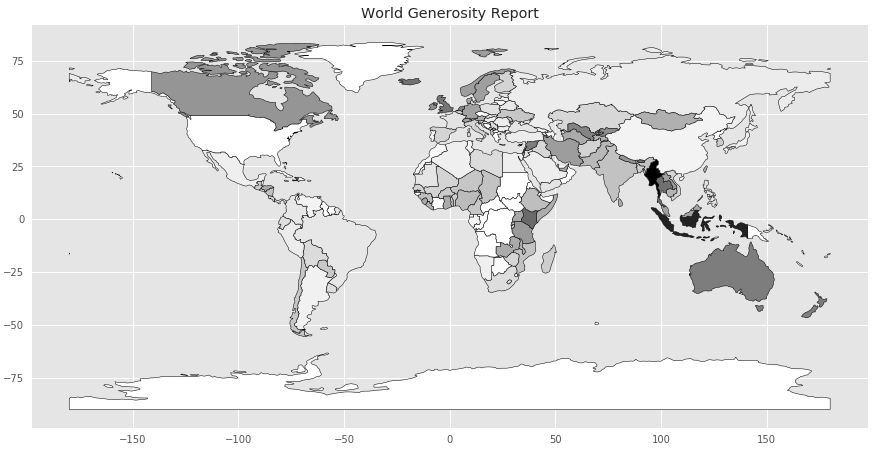

In [72]:
with plt.style.context(("seaborn", "ggplot")):
    world_happiness_final.plot("Generosity",
                               figsize=(15,10),
                               edgecolor="black",)
    plt.title("World Generosity Report")

/Users/alphonsowoodbury/opt/miniconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


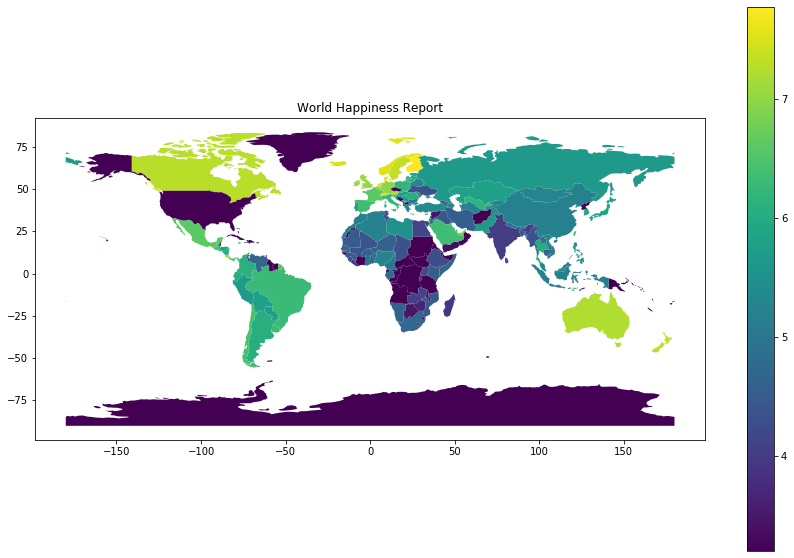

In [74]:
world_happiness_final.plot("Score", figsize=(15,10),legend=True)
plt.title("World Happiness Report");

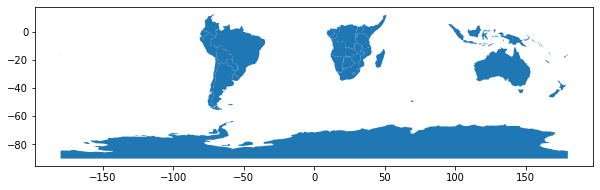

In [79]:
In [1]: world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [2]: southern_world = world.cx[:, :0]

In [3]: southern_world.plot(figsize=(10, 3));

In [80]:
In [1]: world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [2]: cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

In [101]:
world[world['iso_a3'] == 'TZA']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."


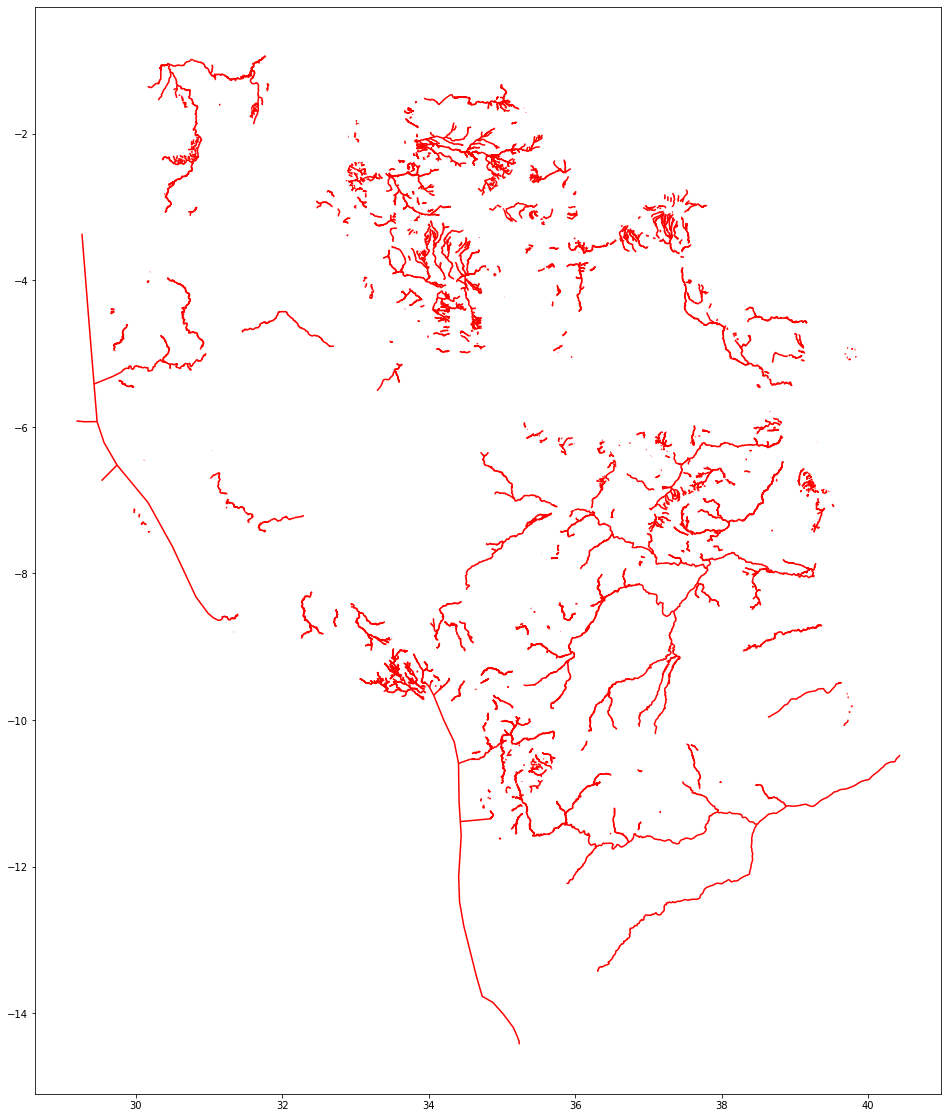

In [104]:
map_df.plot(figsize=(20,20),color='red')
map_df = map_df.to_crs(world.crs)

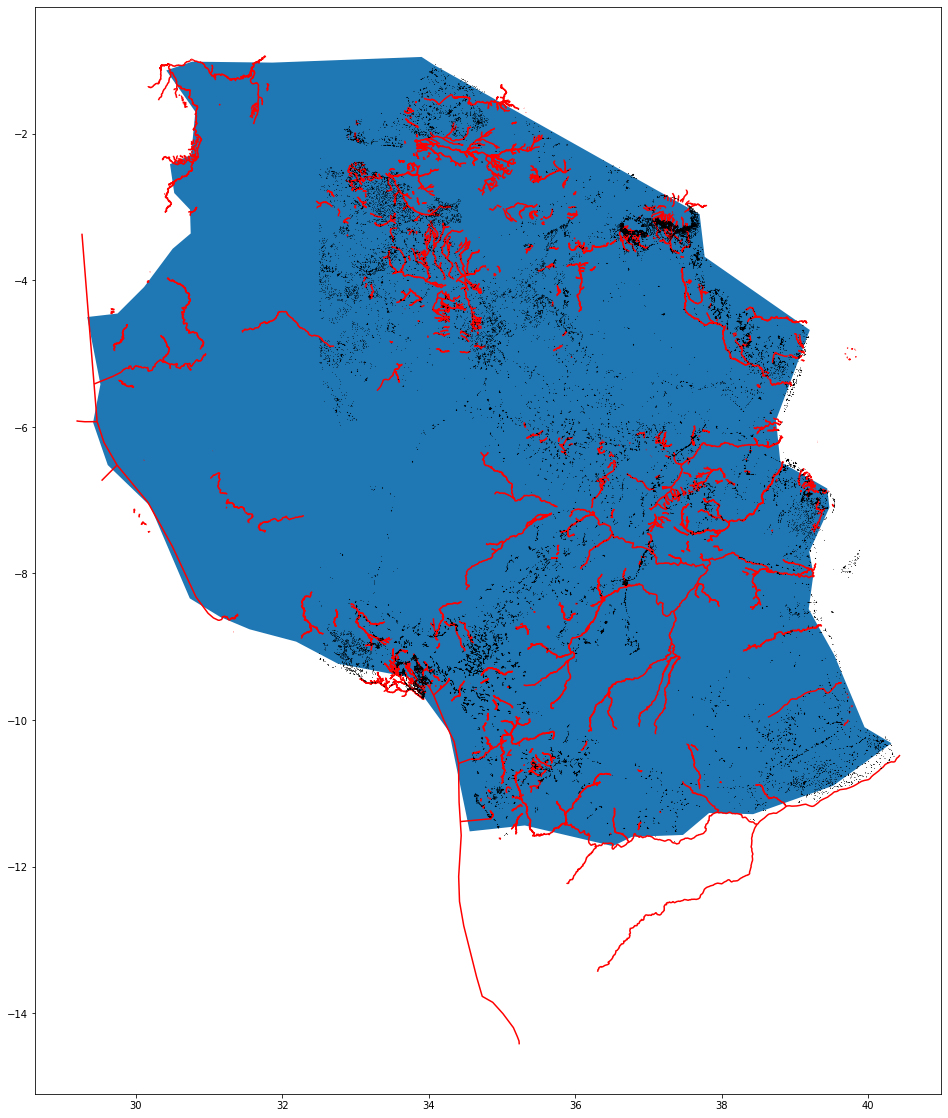

In [119]:
base = world[world['iso_a3'] == 'TZA'].plot(figsize=(20,20))
map_df.plot(ax=base,figsize=(20,20),color='red')
plt.plot(values.longitude, values.latitude,'k*',markersize=0.1)
plt.savefig('tza')

In [ ]:
age = df.eff_built
size = (np.sqrt(well.price**3/(100000000000000)))
fig, ax = plt.subplots(figsize=(60,60))
ax.set_facecolor('xkcd:navy')


scatter = plt.scatter(df.long,df.lat,c=age,s=size, cmap='Set2',alpha=.7)

legend = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Years since last remodeled or built",fontsize='large',prop={'size': 46},markerscale=5)
ax.add_artist(legend)
plt.title('View and relative price by latitude and longitude',fontweight='bold',fontsize=15,x=0.005,ha='left',y=1,va='baseline')
ax.set_aspect('equal')

plt.savefig('rm_age_heat.png')
plt.show()